# Candlestick Rising/Falling Three Methods

https://www.investopedia.com/terms/r/rising-three-methods.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'CARA'
start = '2018-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,12.34,12.85,12.25,12.84,12.84,1026000
2018-01-03,12.81,13.90,12.75,13.52,13.52,1947300
2018-01-04,13.73,13.85,12.56,12.77,12.77,1397500
2018-01-05,12.73,12.95,12.47,12.54,12.54,1127200
2018-01-08,12.54,12.78,12.30,12.43,12.43,1072800


## Candlestick with Rising/Falling Three Methods

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,12.34,12.85,12.25,12.84,12.84,1026000,True
1,736697.0,12.81,13.90,12.75,13.52,13.52,1947300,True
2,736698.0,13.73,13.85,12.56,12.77,12.77,1397500,False
3,736699.0,12.73,12.95,12.47,12.54,12.54,1127200,False
4,736702.0,12.54,12.78,12.30,12.43,12.43,1072800,False


Text(0, 0.5, 'Price')

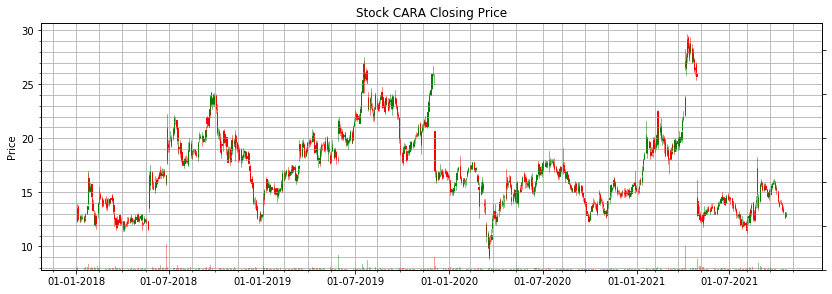

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_methods = talib.CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Close'])

three_methods = three_methods[three_methods != 0]

In [6]:
df['three_methods'] = talib.CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_methods'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_methods
Date,,,,,,,
2019-01-14,15.71,15.85,15.12,15.13,15.13,548800,-100


In [8]:
df['Adj Close'].loc[df['three_methods'] !=0]

Date
2019-01-14    15.13
Name: Adj Close, dtype: float64

In [9]:
df['three_methods'].loc[df['three_methods'] !=0].index

DatetimeIndex(['2019-01-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_methods

Date
2019-01-14   -100
dtype: int32

In [11]:
three_methods.index

DatetimeIndex(['2019-01-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_methods
Date,,,,,,,
2018-01-02,12.34,12.85,12.25,12.84,12.84,1026000,0
2018-01-03,12.81,13.90,12.75,13.52,13.52,1947300,0
2018-01-04,13.73,13.85,12.56,12.77,12.77,1397500,0
2018-01-05,12.73,12.95,12.47,12.54,12.54,1127200,0
2018-01-08,12.54,12.78,12.30,12.43,12.43,1072800,0
...,...,...,...,...,...,...,...
2021-10-15,13.45,13.53,13.08,13.16,13.16,380600,0
2021-10-18,13.15,13.15,12.62,12.72,12.72,569900,0
2021-10-19,12.82,12.86,12.66,12.83,12.83,402300,0


Text(0, 0.5, 'Price')

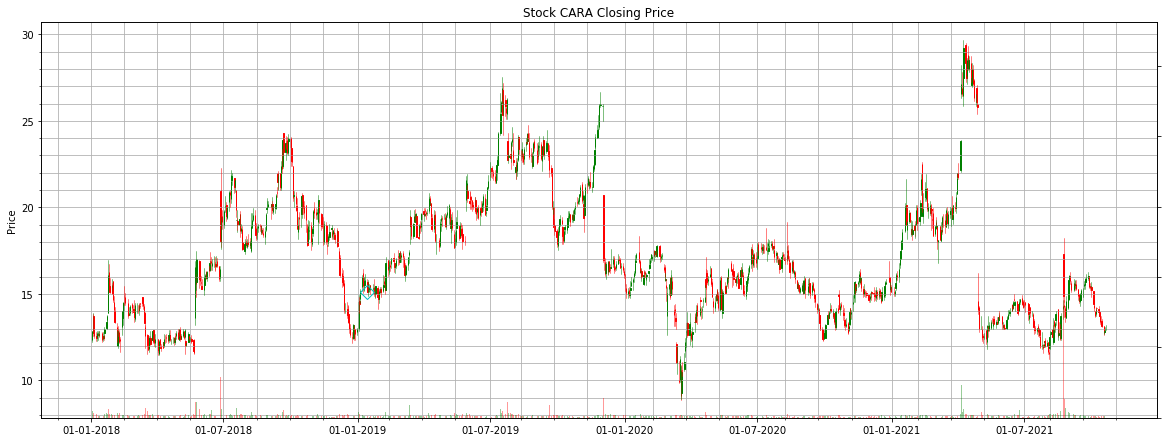

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_methods'] !=0].index, df['Adj Close'].loc[df['three_methods'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2019-01-01':'2019-01-30']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_methods,VolumePositive
0,737061.0,13.01,14.920000,12.83,14.56,14.56,1755100,0,True
1,737062.0,14.57,14.849000,13.88,14.41,14.41,982400,0,False
2,737063.0,14.69,15.300000,14.49,15.18,15.18,825500,0,True
3,737066.0,15.39,16.120001,15.19,15.99,15.99,848000,0,True
4,737067.0,16.23,16.452000,15.04,15.45,15.45,773200,0,False


Text(0, 0.5, 'Price')

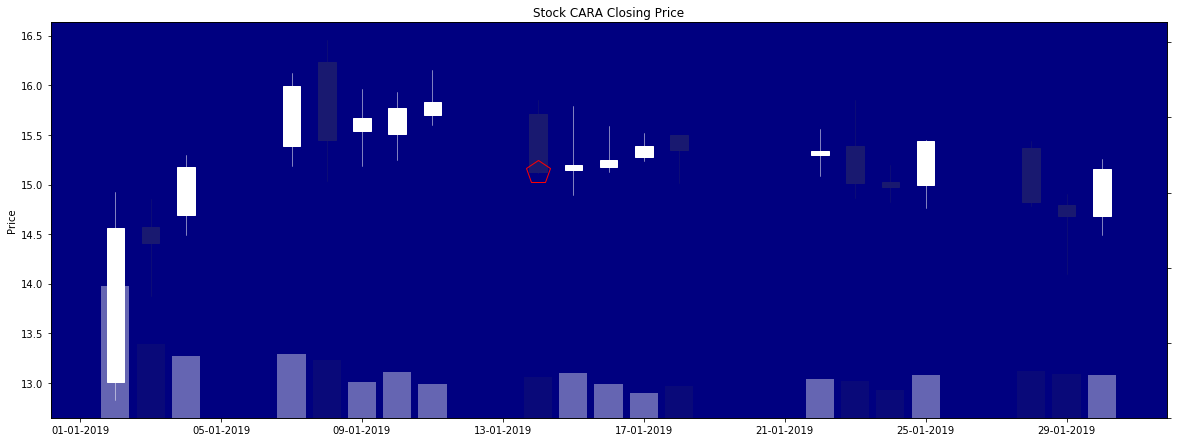

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('navy')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='white', colordown='midnightblue', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_methods'] !=0].index, df['Adj Close'].loc[df['three_methods'] !=0],
                'pr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'white', False: 'midnightblue'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

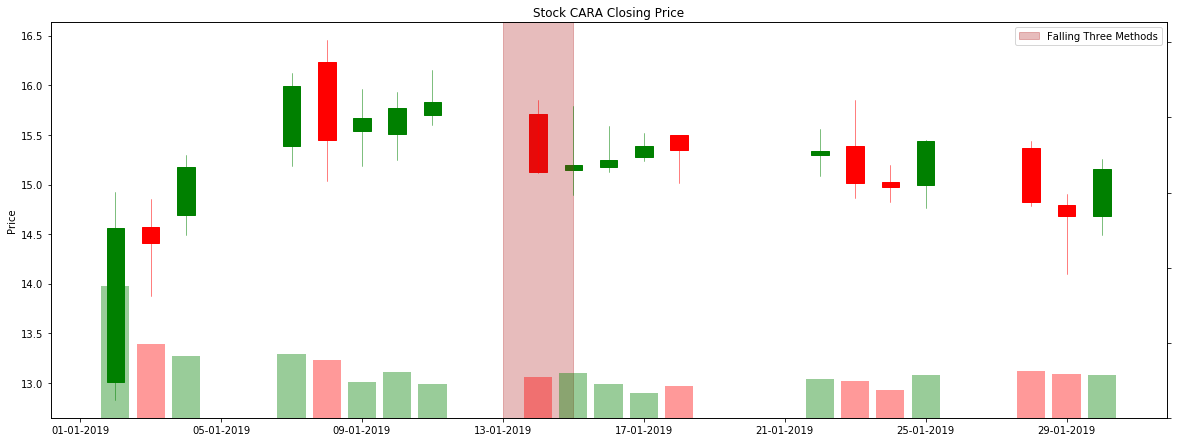

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2019,1,13)), date2num(datetime(2019,1,15)), 
           label="Falling Three Methods",color="firebrick", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')